In [14]:
from sklearn.preprocessing import normalize
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Part 1: Prepare the Data

In [3]:
# Set the path for the CSV
path = "Resources/myopia.csv"

# Turn CSV into DataFrame
df = pd.read_csv(path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Remove the 'Myopic' column from df
df2 = df.drop("MYOPIC", axis = 1)
df2.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
# Standardize the dataset
normalized = normalize(df2)

# Part 2: Apply Dimensionality Reduction

In [13]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Use PCA to preserve 90% of the explained variance in dimensionality reduction
myopic_pca = pca.fit_transform(normalized)

# Turn PCA into DataFrame to see how many features remain (3 left from 14)
pca_df = pd.DataFrame(
    data=myopic_pca,
    columns=["principal component 1", "principal component 2", "principal component 3"],
)
pca_df.head()

,principal component 1,principal component 2,principal component 3
0,0.084691,0.491720,-0.079900
1,-0.238699,-0.180581,0.056533
2,-0.199923,0.099962,0.090228
3,0.215986,0.099406,-0.166582
4,-0.487385,0.121839,-0.034527


In [16]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopic_pca)

C:\anaconda\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [17]:
# Check the number of dimensions
tsne_features.shape

(618, 2)

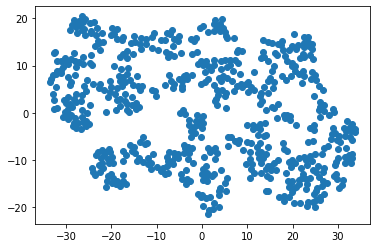

In [18]:
# Create scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [19]:
# Convert tsne data into dataframe for next step
tsne_df = pd.DataFrame(
    data=tsne_features,
    columns=["principal component 1", "principal component 2"],
)
tsne_df.head()

,principal component 1,principal component 2
0,2.621627,18.834887
1,29.060711,-13.416237
2,15.478274,1.188735
3,-10.578279,16.948076
4,25.193789,6.957817


# Part 3: Perform a Cluster Analysis with K-means

In [21]:
# Create a for loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve data
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\anaconda\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


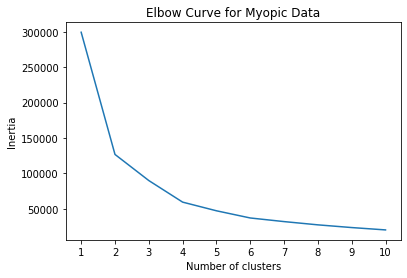

In [22]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Myopic Data')
plt.show()

# Part 4: Make a Recommendation

Based on the data and the K-means model, patients can be clustered together into 4 distinct groups. The below cells will visualize the 4 clusters.

In [29]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=42)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [30]:
clusters = get_clusters(4, tsne_df)

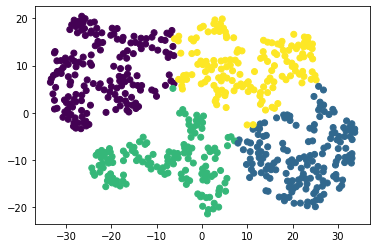

In [31]:
plt.scatter(tsne_df['principal component 1'], tsne_df['principal component 2'], c=tsne_df['class'])
plt.show()